# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

Practico Aprendizaje Supervisado<br>
**Grupo N° 2**

Integrantes:

Conrrero Agustina<br>
Hayas Laura<br>
Legaspi Ana<br>
Luna Andrés


# Practico: Aprendizaje Supervisado

El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos 
en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, 
así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

*Leer atentamente todas las consignas antes de empezar a trabajar, cualquier duda escriban a algún mentor*

# Primera parte: Preparacion de los sets de datos


#### Consigna: Obtener un dataset de los tres pacientes, y uno mas por cada paciente, dando como reslutado 4 datasets. 

En base a lo visto hasta el momento, quizás sea mas predecible el estado pre-ictal separando el análisis por paciente. Vamos a evaluar esta teoria comparando el desempeño de los modelos. Para eso necesitamos los datasets separados. 

----

#### Consigna: Hacer **filtros de outliers** (ver archivo de ejemplo) especifico para cada paciente y para los tres juntos

Si bien el tratamiento de escalado y curado de datos nulos es igual es igual que en el practico de curacion, no aplica para el estudio de outliers, por lo que debera ser realizado nuevamente, esta vez especifico por cada paciente, ademas de en grupo.

----

Al final de esta parte deberian tener cuatro datasets y cuatro filtros de outliers

---
---

**RESOLUCIÓN**

# Importamos los datos

In [ ]:
# Importamos las librerías necesarias para trabajar
from google.colab import drive
import pandas as pd
from google.colab import files
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

SHARED_FOLDER_ALIAS = 'mentoria'
DATASETS_PATH = '/content/drive/MyDrive/' + SHARED_FOLDER_ALIAS + '/data_preprocessed/'

# DATASET POR PACIENTE

## Paciente 1

In [ ]:
# Paciente 1
path = DATASETS_PATH + 'Data_test_P1.csv'
eti_1 = pd.read_csv (path)
print(eti_1)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380   
1         1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333   
2         1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974   
3         1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309   
4         1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037   
...       ...    ...       ...       ...       ...       ...       ...   
1297      1.0    0.0  0.510113  0.281151  0.519344  0.394939  0.164326   
1298      1.0    0.0  0.092055  0.083923  0.034785  0.429554  0.014010   
1299      1.0    0.0  0.343573  0.249455  0.236822  0.460608  0.101302   
1300      1.0    0.0  0.421636  0.269826  0.373106  0.440180  0.148534   
1301      1.0    0.0  0.486570  0.279701  0.481453  0.418555  0.165718   

           STE          Mean        Std      Skew  
0     0.802138  4.426225e-06  15.557899 -0.000629  
1     0

In [ ]:
eti_1_nan = eti_1[eti_1.isna().any(axis=1)]

In [ ]:
eti_1_nan

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
20,1.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
34,1.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
47,1.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
52,1.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
117,1.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
164,1.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
176,1.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
205,1.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
270,1.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
283,1.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0


In [ ]:
# Cantidad de registros con NaN
len(eti_1_nan)

34

In [ ]:
# Dataset con datos etiquetados, sin NaN ni datos nulos.

eti_1_nan_filtered = eti_1.dropna()

In [ ]:
# Verificamos que no hayan quedado NaN
eti_1_nan_filtered[eti_1_nan_filtered.isna().any(axis=1)]


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew


In [ ]:
eti_1_nan_filtered.shape

(1268, 11)

### Análisis de Outliers

In [ ]:
quantifiers = ['PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean',
       'Std', 'Skew']

In [ ]:
eti_1_nan_filtered.columns

Index(['Patient', 'State', 'PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean',
       'Std', 'Skew'],
      dtype='object')

In [ ]:
def outlier_filter(df, c, low, top):
    return df[(df[c] > low) & (df[c] < top)]

# Elimino outliers para cada columna con metodo de cuantiles
def filter_outliers(df, cols, k):
  dff = df.copy()
  for col in cols:
      low = df[col].quantile(k)
      top = df[col].quantile(1-k)
      dff = outlier_filter(dff, col, low, top)
  return dff

    
# Elimino nulos
#dff.dropna(inplace=True)

#df = dff
#df.info()


In [ ]:
eti_1_clean = filter_outliers(eti_1_nan_filtered, quantifiers, 0.02)

In [ ]:
eti_1_clean

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,4.426225e-06,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
3,1.0,0.0,0.535949,0.282724,0.560678,0.391206,0.166309,0.747854,-1.353617e-05,48.590217,-0.024175
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401
...,...,...,...,...,...,...,...,...,...,...,...
1294,1.0,0.0,0.536783,0.283534,0.562999,0.421770,0.218689,0.749422,-8.846124e-07,49.706268,-0.098286
1295,1.0,0.0,0.541033,0.283710,0.569750,0.419114,0.217428,0.752919,1.899028e-05,49.802014,-0.054252
1297,1.0,0.0,0.510113,0.281151,0.519344,0.394939,0.164326,0.726943,9.537731e-07,57.858661,-0.027883
1300,1.0,0.0,0.421636,0.269826,0.373106,0.440180,0.148534,0.656383,-2.206284e-06,35.274970,-0.137801


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

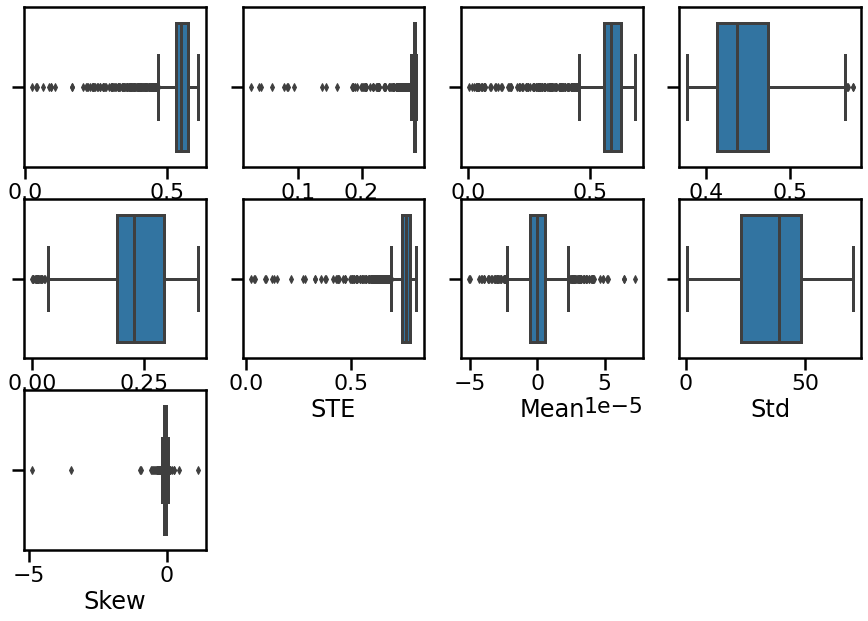

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(eti_1_nan_filtered[i])
    pos += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

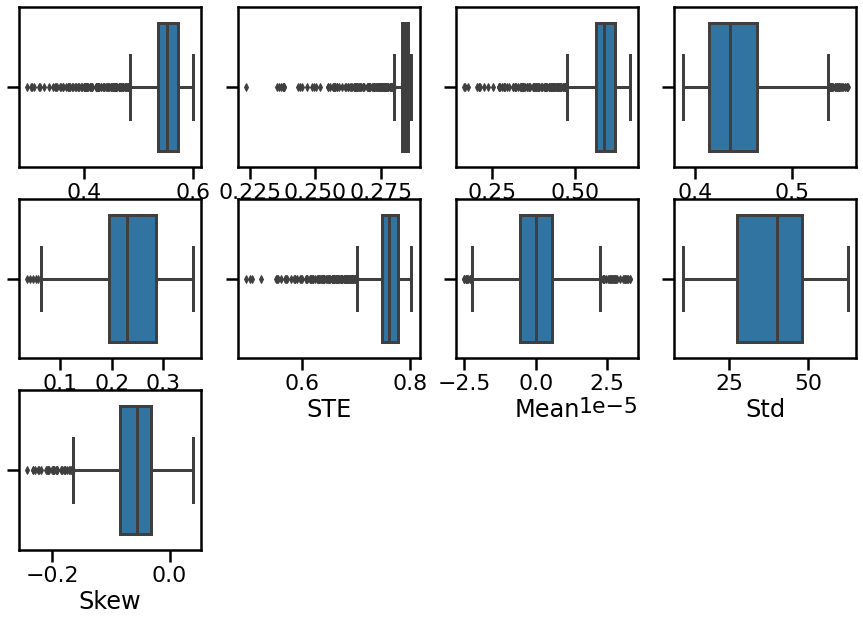

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(eti_1_clean[i])
    pos += 1

In [ ]:
Q_registros_p1 = 1037/1268

In [ ]:
Q_registros_p1

0.8178233438485805

## Paciente 2

In [ ]:
path = DATASETS_PATH + 'Data_test_P2.csv'
eti_2 = pd.read_csv (path)
print(eti_2)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         2.0    0.0  0.580832  0.285770  0.635451  0.600646  0.397346   
1         2.0    0.0  0.580672  0.285824  0.635267  0.594471  0.395368   
2         2.0    0.0  0.572336  0.285645  0.621824  0.577791  0.377290   
3         2.0    0.0  0.566942  0.285178  0.612575  0.532172  0.319409   
4         2.0    0.0  0.571565  0.284667  0.619001  0.488914  0.269929   
...       ...    ...       ...       ...       ...       ...       ...   
2341      2.0    0.0  0.510067  0.283269  0.522142  0.594527  0.300433   
2342      2.0    0.0  0.564873  0.286244  0.610203  0.553031  0.350188   
2343      2.0    1.0  0.362519  0.255691  0.271619  0.569788  0.115600   
2344      2.0    0.0  0.570313  0.286206  0.618980  0.576464  0.364877   
2345      2.0    1.0  0.575551  0.286208  0.627219  0.585996  0.372166   

           STE          Mean        Std      Skew  
0     0.788286  3.267524e-06  28.914999  0.001687  
1     0

In [ ]:
eti_2_nan = eti_2[eti_2.isna().any(axis=1)]
eti_2_nan

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
12,2.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
44,2.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
87,2.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
201,2.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
205,2.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
269,2.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
274,2.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
281,2.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
292,2.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
413,2.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0


In [ ]:
# Cantidad de registros con NaN
len(eti_2_nan)

32

In [ ]:
# Dataset con datos etiquetados, sin NaN ni datos nulos.

eti_2_nan_filtered = eti_2.dropna()

In [ ]:
# Verificamos que no hayan quedado NaN
eti_2_nan_filtered[eti_2_nan_filtered.isna().any(axis=1)]


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew


In [ ]:
eti_2_nan_filtered.shape

(2314, 11)

### Analisis de Outliers

In [ ]:
eti_2_nan_filtered.columns

Index(['Patient', 'State', 'PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean',
       'Std', 'Skew'],
      dtype='object')

In [ ]:
eti_2_clean = filter_outliers(eti_2_nan_filtered, quantifiers, 0.02 )

In [ ]:
eti_2_clean

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
2,2.0,0.0,0.572336,0.285645,0.621824,0.577791,0.377290,0.780848,8.877483e-06,37.022934,-0.090754
3,2.0,0.0,0.566942,0.285178,0.612575,0.532172,0.319409,0.775831,-1.764079e-05,44.845233,-0.008312
6,2.0,0.0,0.552564,0.284369,0.589182,0.529328,0.303794,0.763356,8.149561e-06,49.983464,-0.011894
7,2.0,0.0,0.556818,0.284258,0.595606,0.508472,0.286661,0.766666,2.663218e-07,48.789913,0.027541
11,2.0,1.0,0.565710,0.286255,0.611683,0.576527,0.364277,0.775487,-1.245249e-05,36.183497,-0.319746
...,...,...,...,...,...,...,...,...,...,...,...
2339,2.0,0.0,0.575335,0.286016,0.627089,0.594998,0.388130,0.783866,2.498482e-06,31.013378,-0.071817
2341,2.0,0.0,0.510067,0.283269,0.522142,0.594527,0.300433,0.729515,-1.717178e-05,26.392637,-0.029033
2342,2.0,0.0,0.564873,0.286244,0.610203,0.553031,0.350188,0.774720,1.333844e-05,40.535139,-0.128528
2344,2.0,0.0,0.570313,0.286206,0.618980,0.576464,0.364877,0.779346,-2.007174e-05,39.010453,-0.223666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

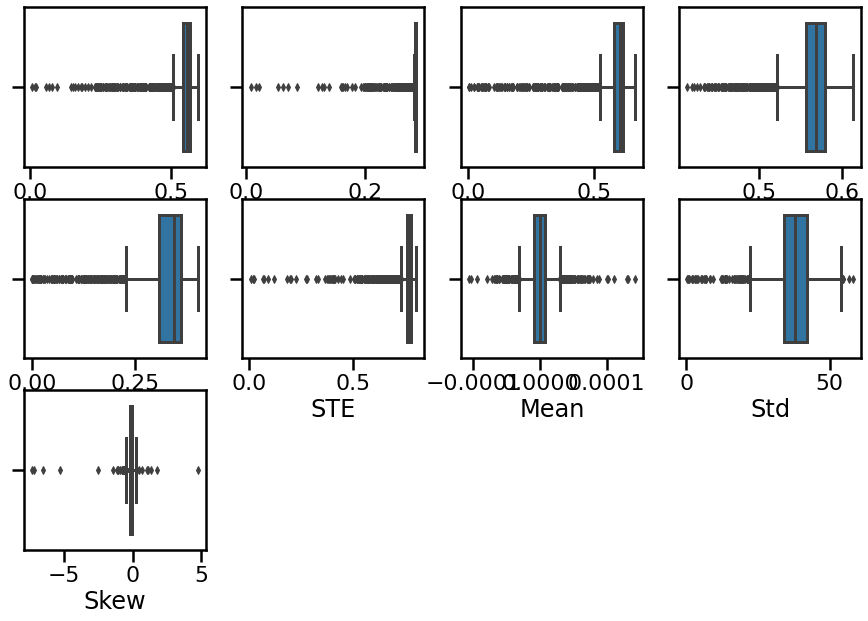

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(eti_2_nan_filtered[i])
    pos += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

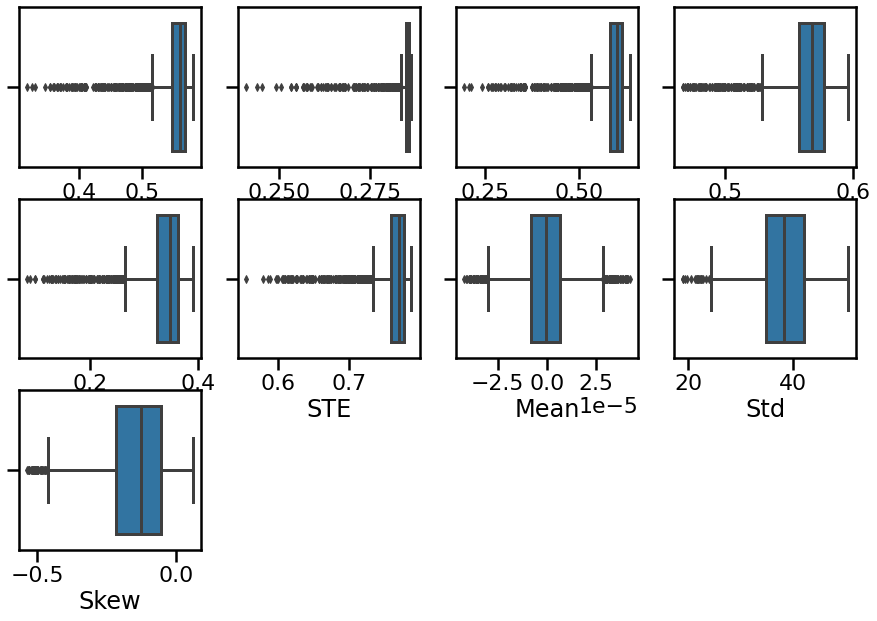

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(eti_2_clean[i])
    pos += 1

In [ ]:
Q_registros_p2 = 1887/2314

In [ ]:
Q_registros_p2

0.8154710458081245

## Paciente 3

In [ ]:
path = DATASETS_PATH + '/Data_test_P3.csv'
eti_3 = pd.read_csv (path)
print(eti_3)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         3.0    0.0  0.479441  0.278778  0.469924  0.443475  0.193504   
1         3.0    0.0  0.465473  0.277148  0.447006  0.453844  0.191880   
2         3.0    0.0  0.492096  0.280312  0.490854  0.455807  0.215496   
3         3.0    0.0  0.486271  0.278803  0.480243  0.420207  0.186225   
4         3.0    0.0  0.493036  0.279539  0.491375  0.425493  0.192620   
...       ...    ...       ...       ...       ...       ...       ...   
2389      3.0    0.0  0.448407  0.274937  0.418891  0.460836  0.176777   
2390      3.0    0.0  0.519529  0.283694  0.537028  0.522160  0.294764   
2391      3.0    1.0  0.532872  0.284772  0.558522  0.501966  0.298883   
2392      3.0    0.0  0.506230  0.281294  0.513469  0.417632  0.203651   
2393      3.0    1.0  0.534341  0.285007  0.561251  0.549156  0.325218   

           STE          Mean        Std      Skew  
0     0.702037 -3.287561e-06  63.641488 -0.114232  
1     0

In [ ]:
eti_3_nan = eti_3[eti_3.isna().any(axis=1)]
eti_3_nan

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
489,3.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
501,3.0,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
586,3.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
726,3.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
1450,3.0,0.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0


In [ ]:
# Cantidad de registros con NaN
len(eti_3_nan)

5

In [ ]:
# Dataset con datos etiquetados, sin NaN ni datos nulos.

eti_3_nan_filtered = eti_3.dropna()

In [ ]:
# Verificamos que no hayan quedado NaN
eti_3_nan_filtered[eti_3_nan_filtered.isna().any(axis=1)]


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew


In [ ]:
eti_3_clean = filter_outliers(eti_3_nan_filtered, quantifiers, 0.02 )

In [ ]:
eti_3_nan_filtered.shape

(2389, 11)

### Analisis de Outliers

In [ ]:
eti_3_nan_filtered.columns

Index(['Patient', 'State', 'PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean',
       'Std', 'Skew'],
      dtype='object')

In [ ]:
eti_3_clean = filter_outliers(eti_3_nan_filtered, quantifiers, 0.02 )

In [ ]:
eti_3_clean

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
3,3.0,0.0,0.486271,0.278803,0.480243,0.420207,0.186225,0.707219,2.473696e-06,54.363639,-0.018547
4,3.0,0.0,0.493036,0.279539,0.491375,0.425493,0.192620,0.712782,-9.303062e-07,53.188962,-0.022277
9,3.0,0.0,0.488883,0.279155,0.484765,0.433493,0.200872,0.709615,-1.465920e-06,51.622943,-0.060702
10,3.0,0.0,0.523893,0.283790,0.543871,0.515461,0.291441,0.739519,-5.698434e-06,25.527093,0.003489
14,3.0,0.0,0.498630,0.280013,0.500453,0.428389,0.199443,0.717519,-7.295549e-06,52.081370,-0.054896
...,...,...,...,...,...,...,...,...,...,...,...
2386,3.0,0.0,0.539265,0.284173,0.567796,0.493027,0.279251,0.751867,1.754938e-05,31.659502,0.034575
2387,3.0,0.0,0.538507,0.283964,0.566291,0.488882,0.272256,0.751040,-1.199099e-05,34.037800,0.046853
2388,3.0,0.0,0.538936,0.284054,0.567047,0.490957,0.270738,0.751444,8.332202e-06,34.746833,0.004379
2390,3.0,0.0,0.519529,0.283694,0.537028,0.522160,0.294764,0.736046,8.581803e-06,27.410843,-0.009101


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

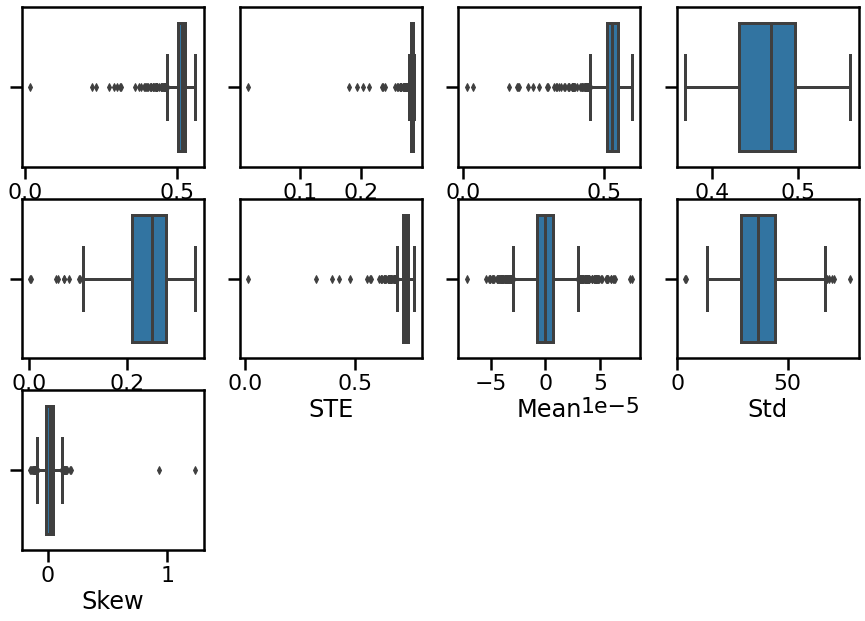

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(eti_3_nan_filtered[i])
    pos += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

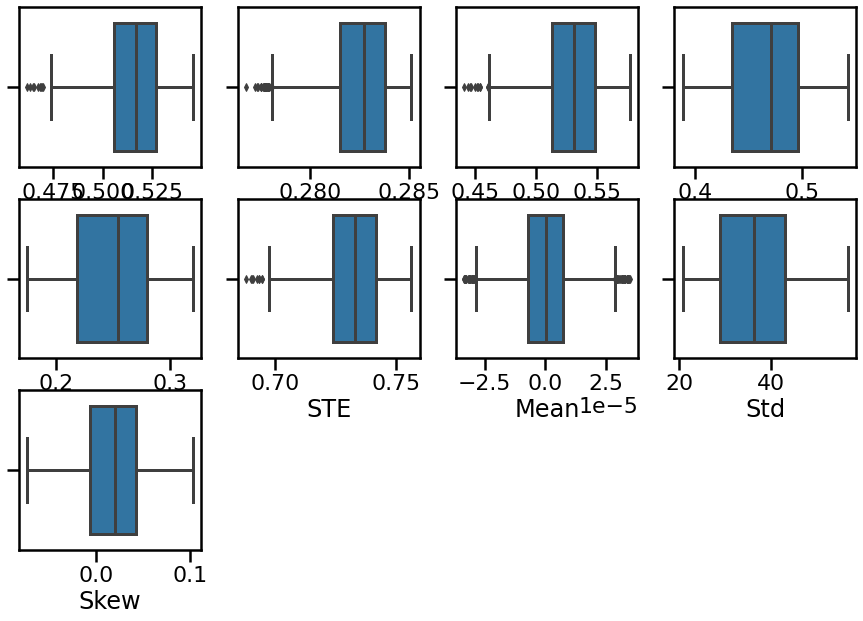

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(eti_3_clean[i])
    pos += 1

In [ ]:
Q_registros_p3 = 1956/2389

In [ ]:
Q_registros_p3

0.818752616157388

# DATASET CON 3 PACIENTES

In [ ]:
# Importamos el dataset con los 3 pacientes, sin datos nulos 

path = DATASETS_PATH + 'all_labeled_curado.csv'
all_labeled_curado = pd.read_csv (path)
print(all_labeled_curado)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380   
1         1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333   
2         1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974   
3         1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309   
4         1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037   
...       ...    ...       ...       ...       ...       ...       ...   
5966      3.0    0.0  0.448407  0.274937  0.418891  0.460836  0.176777   
5967      3.0    0.0  0.519529  0.283694  0.537028  0.522160  0.294764   
5968      3.0    1.0  0.532872  0.284772  0.558522  0.501966  0.298883   
5969      3.0    0.0  0.506230  0.281294  0.513469  0.417632  0.203651   
5970      3.0    1.0  0.534341  0.285007  0.561251  0.549156  0.325218   

           STE          Mean        Std      Skew  
0     0.802138  4.426225e-06  15.557899 -0.000629  
1     0

In [ ]:
#all_labeled_curado = filter_outliers(eti_3_nan_filtered, quantifiers, 0.02)

In [ ]:
all_labeled_curado
#Los registros NaN fueron eliminados en el entregable anterior

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,4.426225e-06,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
3,1.0,0.0,0.535949,0.282724,0.560678,0.391206,0.166309,0.747854,-1.353617e-05,48.590217,-0.024175
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401
...,...,...,...,...,...,...,...,...,...,...,...
5966,3.0,0.0,0.448407,0.274937,0.418891,0.460836,0.176777,0.677723,-1.282332e-05,42.577215,-0.120935
5967,3.0,0.0,0.519529,0.283694,0.537028,0.522160,0.294764,0.736046,8.581803e-06,27.410843,-0.009101
5968,3.0,1.0,0.532872,0.284772,0.558522,0.501966,0.298883,0.747369,-2.371154e-06,29.862033,0.157132
5969,3.0,0.0,0.506230,0.281294,0.513469,0.417632,0.203651,0.724019,-2.262278e-06,38.568322,0.005107


In [ ]:
# Verificamos que no hayan quedado NaN
all_labeled_curado[all_labeled_curado.isna().any(axis=1)]


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew


In [ ]:
all_labeled_curado.shape

(5971, 11)

### Análisis de Outliers

In [ ]:
all_labeled_curado.columns

Index(['Patient', 'State', 'PE', 'SC', 'GNE', 'SE', 'LZC', 'STE', 'Mean',
       'Std', 'Skew'],
      dtype='object')

In [ ]:
all_labeled_curado_filtered = filter_outliers(all_labeled_curado, quantifiers, 0.02)

In [ ]:
all_labeled_curado_filtered

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401
5,1.0,0.0,0.470491,0.272987,0.471743,0.410658,0.153933,0.670242,1.195139e-05,40.564267,-0.070704
6,1.0,0.0,0.547944,0.283322,0.580141,0.409451,0.192583,0.758125,8.023621e-06,49.719216,-0.070339
...,...,...,...,...,...,...,...,...,...,...,...
5965,3.0,0.0,0.538936,0.284054,0.567047,0.490957,0.270738,0.751444,8.332202e-06,34.746833,0.004379
5966,3.0,0.0,0.448407,0.274937,0.418891,0.460836,0.176777,0.677723,-1.282332e-05,42.577215,-0.120935
5967,3.0,0.0,0.519529,0.283694,0.537028,0.522160,0.294764,0.736046,8.581803e-06,27.410843,-0.009101
5969,3.0,0.0,0.506230,0.281294,0.513469,0.417632,0.203651,0.724019,-2.262278e-06,38.568322,0.005107


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

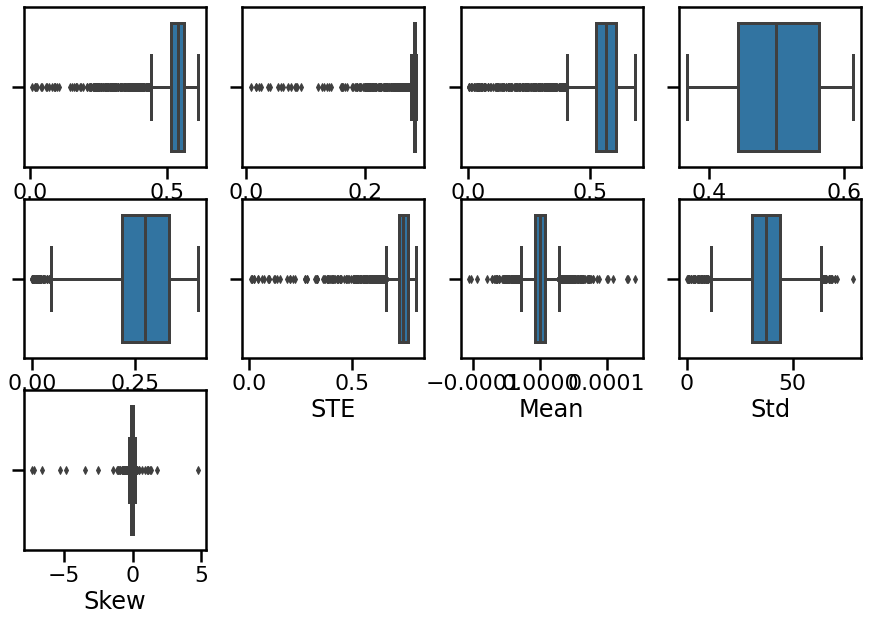

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(all_labeled_curado[i])
    pos += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

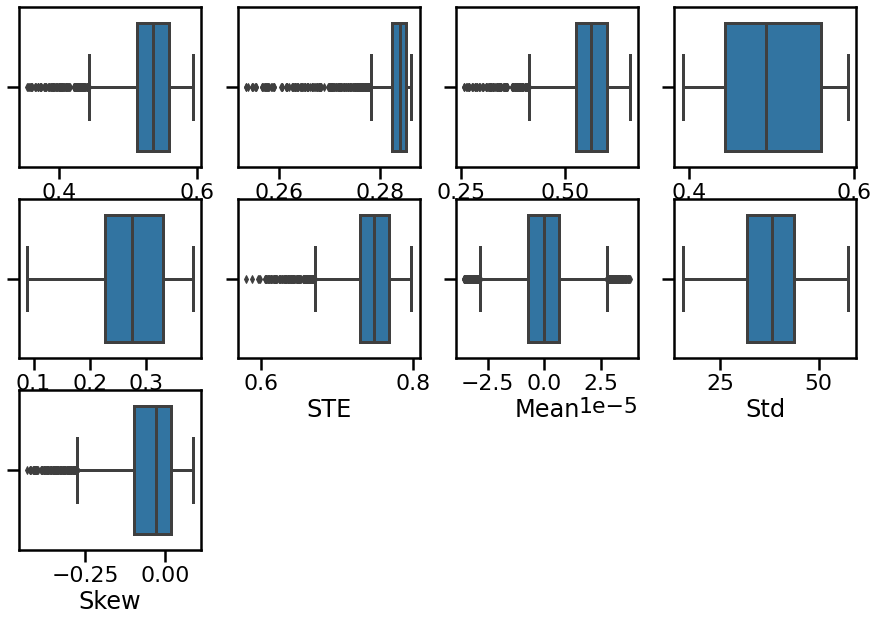

In [ ]:
plt.figure(figsize=(15,10))
pos = 1
for i in quantifiers:
    plt.subplot(3, 4, pos)
    sns.boxplot(all_labeled_curado_filtered[i])
    pos += 1

In [ ]:
Q_registros_3p = 4787/5971

In [ ]:
Q_registros_3p

0.8017082565734382

# Conclusión primera parte
De acuerdo a varias pruebas que fuimos haciendo sobre los datasets, nos quedamos con los datos dentro del quantil 98 en todos los casos. Hicimos visualizaciones de cada uno de los datasets trabajados. En todos los casos se observa una mejora en la distribución, pero específicamente en los pacientes 1 y 2 la eliminación de los outliers mejora visiblemente la distribución en los cuantificadores Mean, Std y Skew y en el Paciente 3 en todos los cuantificadores. <br>


# Segunda parte: Estudio de clasificadores

#### Consigna: instanciar un modelo inicial que se usará como base para comparar con otros modelos. Usar un modelo lineal (ver archivo de ejemplo)

El modelo base es una primera aproximación. No necesariamente estamos en busqueda de ajustar hiperparametros para incrementar unas decimas el F1-Score, sino que mas bien queremos conocer la performance del modelo en su ajuste mas basico. De esa manera cuando comencemos a ajustar mas y usar otros modelos no lineales, sabemos que no deberiamos tener algo peor al base. 

---
#### Consigna: Elegir y justificar un modelo para seleccion de features

Ya se vió que puede existir cierta correlación entre algunas de nuestras features. Para asegurar la efectividad del dataset, vamos a usar algun modelo que prediga cuales son los mejores features.

Fuente: https://towardsdatascience.com/feature-selection-using-logistic-regression-model-efc949569f58

---
#### Consigna: Estudien, prueben, y diagnostiquen distintos clasificadores sobre nuestros set de datos. 

Prueben el dataset etiquetado separando por paciente y con el dataset completo (sin la columna de paciente). Por cada modelo: 

- Aplicar un selector de features
- Estudiar que los hiperparametros se ajusten a nuestro dataset. 
- Refinar la busqueda de hiperparametros usando gridsearchCV o RandomSearchCV (recuerden que mucho antes de los hiperparametros, son los features los que mas determinan la efectividad del modelo). 


Modelos propuestos (no limitarse a):

- Lineal (modelo base): LogisticRegression, SGDClassifier. _Fuente: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model_
- SVM: SVC, NuSVC, LinearSVC. _Fuente: https://scikit-learn.org/stable/modules/svm.html_
- Ensemble:  BaggingClassifier, KNeighborsClassifier, RandomForestClassifier. _Fuente: https://scikit-learn.org/stable/modules/ensemble.html_
- Opcional:
    - Deep Learning: Keras Sequential (ver ejemplo)


Por cada modelo usado deberia haber algun analisis sobre los hiperparametros que mejor se acomodan a nuestro dataset. No es necesario que se limiten a la lista propuesta de metodos. Pero deberia haber como minimo un modelo base, dos de SVM y dos de Ensemble. Pueden opcionalmente usar el VotingClassifier para combinar los resultados de los clasificadores usados en un modelo nuevo

#### Consigna: Armar una grilla de resultados (ver archivo de ejemplo) y realizar conclusiones.

Nota: Recuerden que las conclusiones no son unicamente acerca de cual es el mejor modelo. Cada modelo que instancian sufre una serie de modificaciones que pueden devenir de la teoria o mas bien de la prueba y el error. El resgistro del analisis sobre el desempeño de los modelos nos va a permitir evaluarlos y ubicarlos en el contexto de nuestro dataset particular.


# Paciente 1



## 1) LogisticRegression

### Etiquetas desbalanceadas

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_P1 = eti_1_clean.drop(labels=['State','Patient'], axis=1)
y_P1 = eti_1_clean['State']

In [ ]:
# Train and validation
X_P1_train, X_P1_val, y_P1_train, y_P1_val = train_test_split(X_P1, y_P1, test_size=0.30, random_state=0, shuffle=True)

In [ ]:
scaler = MinMaxScaler()
ft_selector = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [0],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': ['balanced']
}
model1 = LogisticRegression(random_state= 0)

In [ ]:
#ft_selector = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
#ft_selector.fit(X_P1_train, y_P1_train)
#coef = ft_selector.coef_[0]
#coef

In [ ]:
#X_P1

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
  #('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model1)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_P1_train, y_P1_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LogisticRegression(random_state=0))])

In [ ]:
pipe.score(X_P1_val, y_P1_val)

0.9038461538461539

In [ ]:

# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_P1_train_pred = pipe.predict(X_P1_train)
y_P1_test_pred = pipe.predict(X_P1_val)

In [ ]:
print(classification_report(y_P1_train, y_P1_train_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       643
         1.0       0.00      0.00      0.00        82

    accuracy                           0.89       725
   macro avg       0.44      0.50      0.47       725
weighted avg       0.79      0.89      0.83       725



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Balanceo de etiquetas por ADASYN OverSampling:
  




In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
ada = ADASYN(random_state=0)
X_P1_resamp_adasyn, y_P1_resamp_adasyn = ada.fit_resample(X_P1, y_P1)

In [ ]:
eti1_balanced = pd.DataFrame(pd.concat([X_P1_resamp_adasyn, y_P1_resamp_adasyn], axis=1), 
                                    columns=eti_1_clean.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(eti1_balanced)}')
print('==============================')
print(f'Etiquetas:\n{eti1_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
eti1_balanced[:3]

Nuevo tamaño del dataset: 1879
Etiquetas:
1.0    954
0.0    925
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,NaN,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,0.000004,15.557899,-0.000629
1,NaN,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,0.000021,48.467869,-0.031036
2,NaN,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,0.000005,46.771531,-0.077559


In [ ]:
X_P1 = eti1_balanced.drop(labels=['State','Patient'], axis=1)
y_P1 = eti1_balanced['State']

In [ ]:
# Train and validation
X_P1_train, X_P1_val, y_P1_train, y_P1_val = train_test_split(X_P1, y_P1, test_size=0.30, random_state=0, shuffle=True)

In [ ]:
scaler = MinMaxScaler()
ft_selector = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [0],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': ['balanced']
}
model2 = LogisticRegression(random_state= 0)

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model2)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_P1_train, y_P1_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=0,
                                                              solver='liblinear'))),
                ('classifier', LogisticRegression(random_state=0))])

In [ ]:
pipe.score(X_P1_train, y_P1_train)

0.6509505703422053

In [ ]:
pipe.score(X_P1_val, y_P1_val)

0.6968085106382979

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_P1_train_pred = pipe.predict(X_P1_train)
y_P1_test_pred = pipe.predict(X_P1_val)

In [ ]:
print("Entrenamiento")
print(classification_report(y_P1_train, y_P1_train_pred))

print("Validacion")
print(classification_report(y_P1_val, y_P1_test_pred))

Entrenamiento
              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63       639
         1.0       0.65      0.69      0.67       676

    accuracy                           0.65      1315
   macro avg       0.65      0.65      0.65      1315
weighted avg       0.65      0.65      0.65      1315

Validacion
              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70       286
         1.0       0.69      0.71      0.70       278

    accuracy                           0.70       564
   macro avg       0.70      0.70      0.70       564
weighted avg       0.70      0.70      0.70       564



### Balanceo de etiquetas por Random OverSampling:

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

sns.set_context("poster")

In [ ]:
eti_1_clean['State'].value_counts()

0.0    925
1.0    112
Name: State, dtype: int64

In [ ]:
y_P1 = eti_1_clean['State']
X_P1 = eti_1_clean.drop(columns=['State'])

In [ ]:
sampler = RandomOverSampler(random_state=0)
X_P1_resamp_random, y_P1_resamp_random = sampler.fit_resample(X_P1, y_P1)

In [ ]:
eti_1_balanced = pd.DataFrame(pd.concat([X_P1_resamp_random, y_P1_resamp_random], axis=1), 
                                    columns=eti_1_clean.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(eti_1_balanced)}')
print('==============================')
print(f'Etiquetas:\n{eti_1_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
eti_1_balanced[:3]

Nuevo tamaño del dataset: 1850
Etiquetas:
1.0    925
0.0    925
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,0.000004,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,0.000021,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,0.000005,46.771531,-0.077559


In [ ]:
print(len(eti_1_balanced))
eti_1_balanced[:5]

1850


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,4.426225e-06,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
3,1.0,0.0,0.535949,0.282724,0.560678,0.391206,0.166309,0.747854,-1.353617e-05,48.590217,-0.024175
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401


In [ ]:
#Modelo

In [ ]:
X_P1 = eti_1_balanced.drop(labels=['State','Patient'], axis=1)
y_P1 = eti_1_balanced['State']

In [ ]:
# Train and validation
X_P1_train, X_P1_val, y_P1_train, y_P1_val = train_test_split(X_P1, y_P1, test_size=0.30, random_state=0, shuffle=True)

In [ ]:
scaler = MinMaxScaler()
ft_selector = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [0],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': ['balanced']
}
model3 = LogisticRegression(random_state= 0)

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model3)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_P1_train, y_P1_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=0,
                                                              solver='liblinear'))),
                ('classifier', LogisticRegression(random_state=0))])

In [ ]:
pipe.score(X_P1_train, y_P1_train)

0.6733590733590734

In [ ]:
pipe.score(X_P1_val, y_P1_val)

0.7243243243243244

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_P1_train_pred = pipe.predict(X_P1_train)
y_P1_test_pred = pipe.predict(X_P1_val)

In [ ]:
print("Entrenamiento")
print(classification_report(y_P1_train, y_P1_train_pred))

print("Validacion")
print(classification_report(y_P1_val, y_P1_test_pred))

Entrenamiento
              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65       630
         1.0       0.67      0.73      0.70       665

    accuracy                           0.67      1295
   macro avg       0.67      0.67      0.67      1295
weighted avg       0.67      0.67      0.67      1295

Validacion
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       295
         1.0       0.69      0.76      0.72       260

    accuracy                           0.72       555
   macro avg       0.73      0.73      0.72       555
weighted avg       0.73      0.72      0.72       555



### Evaluación del balanceo de etiquetas
Observando las métricas obtenidas anteriormente, decidimos utilizar el dataset balanceado ya que obtuvimos mejores resultados para el Paciente 1 con el método de Logistic Regression. El balanceo lo vamos a realizar por el método de Random OverSampling ya que este método utiliza datos ya existentes en vez de sintetizar nuevos datos, como es el caso de ADASYN OverSampling. 


### Feature Selection

In [ ]:
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Modelo

In [ ]:
X_P1 = eti_1_balanced.drop(labels=['State','Patient'], axis=1)
y_P1 = eti_1_balanced['State']

In [ ]:
# Train and validation
X_P1_train, X_P1_val, y_P1_train, y_P1_val = train_test_split(X_P1, y_P1, test_size=0.30, random_state=42, shuffle=True)

In [ ]:
scaler = MinMaxScaler()
ft_selector = LogisticRegression(random_state=0, penalty='l2', solver='liblinear')
model3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
 # ('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model3)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_P1_train, y_P1_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe.score(X_P1_train, y_P1_train)

0.9335907335907336

In [ ]:
pipe.score(X_P1_val, y_P1_val)

0.8738738738738738

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_P1_train_pred = pipe.predict(X_P1_train)
y_P1_test_pred = pipe.predict(X_P1_val)

In [ ]:
print("Entrenamiento sin utilizar feature_selector")
print(classification_report(y_P1_train, y_P1_train_pred))

print("Validacion sin utilizar feature_selector")
print(classification_report(y_P1_val, y_P1_test_pred))

Entrenamiento sin utilizar feature_selector
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93       650
         1.0       0.88      1.00      0.94       645

    accuracy                           0.93      1295
   macro avg       0.94      0.93      0.93      1295
weighted avg       0.94      0.93      0.93      1295

Validacion sin utilizar feature_selector
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.85       275
         1.0       0.80      1.00      0.89       280

    accuracy                           0.87       555
   macro avg       0.90      0.87      0.87       555
weighted avg       0.90      0.87      0.87       555



In [ ]:
#Utilizando el selector de features:

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
 ('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model3)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_P1_train, y_P1_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=0,
                                                              solver='liblinear'))),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe.score(X_P1_train, y_P1_train)

0.9305019305019305

In [ ]:
pipe.score(X_P1_val, y_P1_val)

0.8774774774774775

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_P1_train_pred = pipe.predict(X_P1_train)
y_P1_test_pred = pipe.predict(X_P1_val)

In [ ]:
print("Entrenamiento utilizando feature_selector")
print(classification_report(y_P1_train, y_P1_train_pred))

print("Validacion utilizando feature_selector")
print(classification_report(y_P1_val, y_P1_test_pred))

Entrenamiento utilizando feature_selector
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93       650
         1.0       0.88      1.00      0.93       645

    accuracy                           0.93      1295
   macro avg       0.94      0.93      0.93      1295
weighted avg       0.94      0.93      0.93      1295

Validacion utilizando feature_selector
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86       275
         1.0       0.80      1.00      0.89       280

    accuracy                           0.88       555
   macro avg       0.90      0.88      0.88       555
weighted avg       0.90      0.88      0.88       555




Anteriormente, analizamos los resultados del modelo utilizando un selector de features (LogisticRegression) comparando con aquellos obtenidos del modelo sin la utilización de este selector. 

Dado a que nuestro dataset no presenta una dimensión tan grande, y los resultados no muestran un beneficio sustantivo, no vemos la necesidad de utilizar un selector de features. 
Este análisis fue repetido para otros pacientes y se obtuvieron los mismos resultados, por lo que se obvia el procedimiento de los mismos. 

## 2) Seleccion de modelo


In [ ]:
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clfs_P1 = [LogisticRegression(), 
           SVC(), 
           NuSVC(), 
           KNeighborsClassifier(), 
           RandomForestClassifier()] 

In [ ]:
for clf in clfs_P1:
  print(f"Probando Modelo {str(clf)}")
  pipe = Pipeline([
  ('scaler', scaler),
   #('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', clf)
  ])

  pipe.fit(X_P1_train, y_P1_train)
#svr_cv = model
  pipe.score(X_P1_val, y_P1_val)
  # Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
  y_P1_train_pred = pipe.predict(X_P1_train)
  y_P1_test_pred = pipe.predict(X_P1_val)


  print("Entrenamiento")
  print(classification_report(y_P1_train, y_P1_train_pred))
  print("Validacion")
  print(classification_report(y_P1_val, y_P1_test_pred))


Probando Modelo LogisticRegression()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67       650
         1.0       0.67      0.71      0.69       645

    accuracy                           0.68      1295
   macro avg       0.68      0.68      0.68      1295
weighted avg       0.68      0.68      0.68      1295

Validacion
              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68       275
         1.0       0.68      0.75      0.72       280

    accuracy                           0.70       555
   macro avg       0.70      0.70      0.70       555
weighted avg       0.70      0.70      0.70       555

Probando Modelo SVC()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.80      0.63      0.70       650
         1.0       0.69      0.84      0.76       645

    accuracy                           0.73      1295
   macro avg       0.74      0

Para el paciente 1, el modelo que mejor clasifica es el Random Forest Classifier.

# Paciente 2



## 1) LogisticRegression

### Balanceo de etiquetas por Random OverSampling:

In [ ]:
eti_2_clean['State'].value_counts()

0.0    1767
1.0     120
Name: State, dtype: int64

In [ ]:
y_P2 = eti_2_clean['State']
X_P2 = eti_2_clean.drop(columns=['State'])

In [ ]:
sampler = RandomOverSampler(random_state=0)
X_P2_resamp_random, y_P2_resamp_random = sampler.fit_resample(X_P2, y_P2)

In [ ]:
eti_2_balanced = pd.DataFrame(pd.concat([X_P2_resamp_random, y_P2_resamp_random], axis=1), 
                                    columns=eti_2_clean.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(eti_2_balanced)}')
print('==============================')
print(f'Etiquetas:\n{eti_2_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
eti_2_balanced[:3]

Nuevo tamaño del dataset: 3534
Etiquetas:
0.0    1767
1.0    1767
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,2.0,0.0,0.572336,0.285645,0.621824,0.577791,0.377290,0.780848,0.000009,37.022934,-0.090754
1,2.0,0.0,0.566942,0.285178,0.612575,0.532172,0.319409,0.775831,-0.000018,44.845233,-0.008312
2,2.0,0.0,0.552564,0.284369,0.589182,0.529328,0.303794,0.763356,0.000008,49.983464,-0.011894


In [ ]:
print(len(eti_2_balanced))
eti_2_balanced[:5]

3534


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,2.0,0.0,0.572336,0.285645,0.621824,0.577791,0.377290,0.780848,8.877483e-06,37.022934,-0.090754
1,2.0,0.0,0.566942,0.285178,0.612575,0.532172,0.319409,0.775831,-1.764079e-05,44.845233,-0.008312
2,2.0,0.0,0.552564,0.284369,0.589182,0.529328,0.303794,0.763356,8.149561e-06,49.983464,-0.011894
3,2.0,0.0,0.556818,0.284258,0.595606,0.508472,0.286661,0.766666,2.663218e-07,48.789913,0.027541
4,2.0,1.0,0.565710,0.286255,0.611683,0.576527,0.364277,0.775487,-1.245249e-05,36.183497,-0.319746


In [ ]:
#Modelo

In [ ]:
X_P2 = eti_2_balanced.drop(labels=['State','Patient'], axis=1)
y_P2 = eti_2_balanced['State']

In [ ]:
# Train and validation
X_P2_train, X_P2_val, y_P2_train, y_P2_val = train_test_split(X_P2, y_P2, test_size=0.30, random_state=42, shuffle=True)

In [ ]:
scaler = MinMaxScaler()
ft_selector = LogisticRegression(random_state=0, penalty='l2', solver='liblinear')
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [0],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': ['balanced']
}
model3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model3)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_P2_train, y_P2_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=0,
                                                              solver='liblinear'))),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe.score(X_P2_train, y_P2_train)

0.9611807521229276

In [ ]:
pipe.score(X_P2_val, y_P2_val)

0.9029217719132894

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_P2_train_pred = pipe.predict(X_P2_train)
y_P2_test_pred = pipe.predict(X_P2_val)

In [ ]:
print("Entrenamiento")
print(classification_report(y_P2_train, y_P2_train_pred))

print("Validacion")
print(classification_report(y_P2_val, y_P2_test_pred))

Entrenamiento
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1214
         1.0       0.93      1.00      0.96      1259

    accuracy                           0.96      2473
   macro avg       0.96      0.96      0.96      2473
weighted avg       0.96      0.96      0.96      2473

Validacion
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90       553
         1.0       0.83      1.00      0.91       508

    accuracy                           0.90      1061
   macro avg       0.92      0.91      0.90      1061
weighted avg       0.92      0.90      0.90      1061



In [ ]:
eti_2_clean['State'].value_counts()

0.0    1767
1.0     120
Name: State, dtype: int64

In [ ]:
y_P2 = eti_2_clean['State']
X_P2 = eti_2_clean.drop(columns=['State'])

In [ ]:
sampler = RandomOverSampler(random_state=0)
X_P2_resamp_random, y_P2_resamp_random = sampler.fit_resample(X_P2, y_P2)

In [ ]:
eti_2_balanced = pd.DataFrame(pd.concat([X_P2_resamp_random, y_P2_resamp_random], axis=1), 
                                    columns=eti_2_clean.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(eti_2_balanced)}')
print('==============================')
print(f'Etiquetas:\n{eti_2_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
eti_2_balanced[:3]

Nuevo tamaño del dataset: 3534
Etiquetas:
0.0    1767
1.0    1767
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,2.0,0.0,0.572336,0.285645,0.621824,0.577791,0.377290,0.780848,0.000009,37.022934,-0.090754
1,2.0,0.0,0.566942,0.285178,0.612575,0.532172,0.319409,0.775831,-0.000018,44.845233,-0.008312
2,2.0,0.0,0.552564,0.284369,0.589182,0.529328,0.303794,0.763356,0.000008,49.983464,-0.011894


In [ ]:
print(len(eti_2_balanced))
eti_2_balanced[:5]

3534


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,2.0,0.0,0.572336,0.285645,0.621824,0.577791,0.377290,0.780848,8.877483e-06,37.022934,-0.090754
1,2.0,0.0,0.566942,0.285178,0.612575,0.532172,0.319409,0.775831,-1.764079e-05,44.845233,-0.008312
2,2.0,0.0,0.552564,0.284369,0.589182,0.529328,0.303794,0.763356,8.149561e-06,49.983464,-0.011894
3,2.0,0.0,0.556818,0.284258,0.595606,0.508472,0.286661,0.766666,2.663218e-07,48.789913,0.027541
4,2.0,1.0,0.565710,0.286255,0.611683,0.576527,0.364277,0.775487,-1.245249e-05,36.183497,-0.319746


In [ ]:
#Modelo

In [ ]:
X_P2 = eti_2_balanced.drop(labels=['State','Patient'], axis=1)
y_P2 = eti_2_balanced['State']

In [ ]:
# Train and validation
X_P2_train, X_P2_val, y_P2_train, y_P2_val = train_test_split(X_P2, y_P2, test_size=0.30, random_state=0, shuffle=True)

## 2) Seleccion de modelo


In [ ]:
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clfs_P2 = [LogisticRegression(), 
           SVC(), 
           NuSVC(), 
           KNeighborsClassifier(), 
           RandomForestClassifier()] 

In [ ]:
for clf in clfs_P2:
  print(f"Probando Modelo {str(clf)}")
  pipe = Pipeline([
  ('scaler', scaler),
   #('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', clf)
  ])

  pipe.fit(X_P2_train, y_P2_train)
#svr_cv = model
  pipe.score(X_P2_val, y_P2_val)
  # Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
  y_P2_train_pred = pipe.predict(X_P2_train)
  y_P2_test_pred = pipe.predict(X_P2_val)


  print("Entrenamiento")
  print(classification_report(y_P2_train, y_P2_train_pred))
  print("Validacion")
  print(classification_report(y_P2_val, y_P2_test_pred))


Probando Modelo LogisticRegression()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64      1222
         1.0       0.65      0.71      0.68      1251

    accuracy                           0.66      2473
   macro avg       0.66      0.66      0.66      2473
weighted avg       0.66      0.66      0.66      2473

Validacion
              precision    recall  f1-score   support

         0.0       0.68      0.61      0.64       545
         1.0       0.63      0.70      0.66       516

    accuracy                           0.65      1061
   macro avg       0.66      0.65      0.65      1061
weighted avg       0.66      0.65      0.65      1061

Probando Modelo SVC()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67      1222
         1.0       0.68      0.87      0.76      1251

    accuracy                           0.72      2473
   macro avg       0.75      0

Para el paciente 2, el modelo que mejor clasifica es el Random Forest Classifier.

# Paciente 3



## 1) LogisticRegression

### Balanceo de etiquetas por Random OverSampling:

In [ ]:
eti_3_clean['State'].value_counts()

0.0    1843
1.0     113
Name: State, dtype: int64

In [ ]:
y_P3 = eti_3_clean['State']
X_P3 = eti_3_clean.drop(columns=['State'])

In [ ]:
sampler = RandomOverSampler(random_state=0)
X_P3_resamp_random, y_P3_resamp_random = sampler.fit_resample(X_P3, y_P3)

In [ ]:
eti_3_balanced = pd.DataFrame(pd.concat([X_P3_resamp_random, y_P3_resamp_random], axis=1), 
                                    columns=eti_3_clean.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(eti_3_balanced)}')
print('==============================')
print(f'Etiquetas:\n{eti_3_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
eti_3_balanced[:3]

Nuevo tamaño del dataset: 3686
Etiquetas:
0.0    1843
1.0    1843
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,3.0,0.0,0.486271,0.278803,0.480243,0.420207,0.186225,0.707219,2.473696e-06,54.363639,-0.018547
1,3.0,0.0,0.493036,0.279539,0.491375,0.425493,0.192620,0.712782,-9.303062e-07,53.188962,-0.022277
2,3.0,0.0,0.488883,0.279155,0.484765,0.433493,0.200872,0.709615,-1.465920e-06,51.622943,-0.060702


In [ ]:
print(len(eti_3_balanced))
eti_3_balanced[:5]

3686


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,3.0,0.0,0.486271,0.278803,0.480243,0.420207,0.186225,0.707219,2.473696e-06,54.363639,-0.018547
1,3.0,0.0,0.493036,0.279539,0.491375,0.425493,0.192620,0.712782,-9.303062e-07,53.188962,-0.022277
2,3.0,0.0,0.488883,0.279155,0.484765,0.433493,0.200872,0.709615,-1.465920e-06,51.622943,-0.060702
3,3.0,0.0,0.523893,0.283790,0.543871,0.515461,0.291441,0.739519,-5.698434e-06,25.527093,0.003489
4,3.0,0.0,0.498630,0.280013,0.500453,0.428389,0.199443,0.717519,-7.295549e-06,52.081370,-0.054896


In [ ]:
#Modelo

In [ ]:
X_P3 = eti_3_balanced.drop(labels=['State','Patient'], axis=1)
y_P3 = eti_3_balanced['State']

In [ ]:
# Train and validation
X_P3_train, X_P3_val, y_P3_train, y_P3_val = train_test_split(X_P3, y_P3, test_size=0.30, random_state=0, shuffle=True)

In [ ]:
scaler = MinMaxScaler()
ft_selector = LogisticRegression(random_state=0, penalty='l2', solver='liblinear')
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [0],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': ['balanced']
}
model3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model3)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_P3_train, y_P3_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=0,
                                                              solver='liblinear'))),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe.score(X_P3_train, y_P3_train)

0.9624031007751938

In [ ]:
pipe.score(X_P3_val, y_P3_val)

0.9430379746835443

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_P3_train_pred = pipe.predict(X_P3_train)
y_P3_test_pred = pipe.predict(X_P3_val)

In [ ]:
print("Entrenamiento")
print(classification_report(y_P3_train, y_P3_train_pred))

print("Validacion")
print(classification_report(y_P3_val, y_P3_test_pred))

Entrenamiento
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      1296
         1.0       0.93      1.00      0.96      1284

    accuracy                           0.96      2580
   macro avg       0.96      0.96      0.96      2580
weighted avg       0.97      0.96      0.96      2580

Validacion
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94       547
         1.0       0.90      1.00      0.95       559

    accuracy                           0.94      1106
   macro avg       0.95      0.94      0.94      1106
weighted avg       0.95      0.94      0.94      1106



In [ ]:
eti_3_clean['State'].value_counts()

0.0    1843
1.0     113
Name: State, dtype: int64

In [ ]:
y_P3 = eti_3_clean['State']
X_P3 = eti_3_clean.drop(columns=['State'])

In [ ]:
sampler = RandomOverSampler(random_state=0)
X_P3_resamp_random, y_P3_resamp_random = sampler.fit_resample(X_P3, y_P3)

In [ ]:
eti_3_balanced = pd.DataFrame(pd.concat([X_P3_resamp_random, y_P3_resamp_random], axis=1), 
                                    columns=eti_3_clean.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(eti_3_balanced)}')
print('==============================')
print(f'Etiquetas:\n{eti_3_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
eti_3_balanced[:3]

Nuevo tamaño del dataset: 3686
Etiquetas:
0.0    1843
1.0    1843
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,3.0,0.0,0.486271,0.278803,0.480243,0.420207,0.186225,0.707219,2.473696e-06,54.363639,-0.018547
1,3.0,0.0,0.493036,0.279539,0.491375,0.425493,0.192620,0.712782,-9.303062e-07,53.188962,-0.022277
2,3.0,0.0,0.488883,0.279155,0.484765,0.433493,0.200872,0.709615,-1.465920e-06,51.622943,-0.060702


In [ ]:
print(len(eti_3_balanced))
eti_3_balanced[:5]

3686


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,3.0,0.0,0.486271,0.278803,0.480243,0.420207,0.186225,0.707219,2.473696e-06,54.363639,-0.018547
1,3.0,0.0,0.493036,0.279539,0.491375,0.425493,0.192620,0.712782,-9.303062e-07,53.188962,-0.022277
2,3.0,0.0,0.488883,0.279155,0.484765,0.433493,0.200872,0.709615,-1.465920e-06,51.622943,-0.060702
3,3.0,0.0,0.523893,0.283790,0.543871,0.515461,0.291441,0.739519,-5.698434e-06,25.527093,0.003489
4,3.0,0.0,0.498630,0.280013,0.500453,0.428389,0.199443,0.717519,-7.295549e-06,52.081370,-0.054896


In [ ]:
#Modelo

In [ ]:
X_P3 = eti_3_balanced.drop(labels=['State','Patient'], axis=1)
y_P3 = eti_3_balanced['State']

In [ ]:
# Train and validation
X_P3_train, X_P3_val, y_P3_train, y_P3_val = train_test_split(X_P3, y_P3, test_size=0.30, random_state=0, shuffle=True)

## 2) Seleccion de modelo


In [ ]:
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clfs_P3 = [LogisticRegression(), 
           SVC(), 
           NuSVC(), 
           KNeighborsClassifier(), 
           RandomForestClassifier()] 

In [ ]:
for clf in clfs_P3:
  print(f"Probando Modelo {str(clf)}")
  pipe = Pipeline([
  ('scaler', scaler),
   #('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', clf)
  ])

  pipe.fit(X_P3_train, y_P3_train)
#svr_cv = model
  pipe.score(X_P3_val, y_P3_val)
  # Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
  y_P3_train_pred = pipe.predict(X_P3_train)
  y_P3_test_pred = pipe.predict(X_P3_val)


  print("Entrenamiento")
  print(classification_report(y_P3_train, y_P3_train_pred))
  print("Validacion")
  print(classification_report(y_P3_val, y_P3_test_pred))


Probando Modelo LogisticRegression()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63      1296
         1.0       0.64      0.76      0.69      1284

    accuracy                           0.66      2580
   macro avg       0.67      0.66      0.66      2580
weighted avg       0.67      0.66      0.66      2580

Validacion
              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65       547
         1.0       0.66      0.76      0.71       559

    accuracy                           0.68      1106
   macro avg       0.69      0.68      0.68      1106
weighted avg       0.69      0.68      0.68      1106

Probando Modelo SVC()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.83      0.53      0.64      1296
         1.0       0.65      0.89      0.75      1284

    accuracy                           0.71      2580
   macro avg       0.74      0

Para el paciente 3, el modelo que mejor clasifica es el Random Forest Classifier.

# 3 Pacientes juntos



## 1) LogisticRegression

### Balanceo de etiquetas por Random OverSampling:

In [ ]:
all_labeled_curado_filtered['State'].value_counts()

0.0    4466
1.0    4466
Name: State, dtype: int64

In [ ]:
y_3P = all_labeled_curado_filtered['State']
X_3P = all_labeled_curado_filtered.drop(columns=['State'])

In [ ]:
sampler = RandomOverSampler(random_state=0)
X_3P_resamp_random, y_3P_resamp_random = sampler.fit_resample(X_3P, y_3P)

In [ ]:
all_labeled_curado_balanced = pd.DataFrame(pd.concat([X_3P_resamp_random, y_3P_resamp_random], axis=1), 
                                    columns=all_labeled_curado.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(all_labeled_curado_balanced)}')
print('==============================')
print(f'Etiquetas:\n{all_labeled_curado_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
all_labeled_curado_balanced[:3]

Nuevo tamaño del dataset: 8932
Etiquetas:
0.0    4466
1.0    4466
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
1,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
2,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401


In [ ]:
print(len(all_labeled_curado_balanced))
all_labeled_curado_balanced[:5]

8932


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
1,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
2,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401
3,1.0,0.0,0.470491,0.272987,0.471743,0.410658,0.153933,0.670242,1.195139e-05,40.564267,-0.070704
4,1.0,0.0,0.547944,0.283322,0.580141,0.409451,0.192583,0.758125,8.023621e-06,49.719216,-0.070339


In [ ]:
#Modelo

In [ ]:
X_3P = all_labeled_curado_balanced.drop(labels=['State','Patient'], axis=1)
y_3P = all_labeled_curado_balanced['State']

In [ ]:
# Train and validation
X_3P_train, X_3P_val, y_3P_train, y_3P_val = train_test_split(X_3P, y_3P, test_size=0.30, random_state=0, shuffle=True)

In [ ]:
scaler = MinMaxScaler()
ft_selector = LogisticRegression(random_state=0, penalty='l2', solver='liblinear')
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [0],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': ['balanced']
}
model3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit
pipe = Pipeline([
  ('scaler', scaler),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', model3)
])

#model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

pipe.fit(X_3P_train, y_3P_train)
#svr_cv = model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=0,
                                                              solver='liblinear'))),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe.score(X_3P_train, y_3P_train)

0.9577735124760077

In [ ]:
pipe.score(X_3P_val, y_3P_val)

0.9227611940298508

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_3P_train_pred = pipe.predict(X_3P_train)
y_3P_test_pred = pipe.predict(X_3P_val)

In [ ]:
print("Entrenamiento")
print(classification_report(y_3P_train, y_3P_train_pred))

print("Validacion")
print(classification_report(y_3P_val, y_3P_test_pred))

Entrenamiento
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      3128
         1.0       0.92      1.00      0.96      3124

    accuracy                           0.96      6252
   macro avg       0.96      0.96      0.96      6252
weighted avg       0.96      0.96      0.96      6252

Validacion
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      1338
         1.0       0.87      1.00      0.93      1342

    accuracy                           0.92      2680
   macro avg       0.93      0.92      0.92      2680
weighted avg       0.93      0.92      0.92      2680



In [ ]:
all_labeled_curado_balanced['State'].value_counts()

1.0    5536
0.0    5536
Name: State, dtype: int64

In [ ]:
y_3P = all_labeled_curado_balanced['State']
X_3P = all_labeled_curado_balanced.drop(columns=['State'])

In [ ]:
sampler = RandomOverSampler(random_state=0)
X_3P_resamp_random, y_3P_resamp_random = sampler.fit_resample(X_3P, y_3P)

In [ ]:
all_labeled_curado_balanced = pd.DataFrame(pd.concat([X_3P_resamp_random, y_3P_resamp_random], axis=1), 
                                    columns=all_labeled_curado.columns)

In [ ]:
print(f'Nuevo tamaño del dataset: {len(all_labeled_curado_balanced)}')
print('==============================')
print(f'Etiquetas:\n{all_labeled_curado_balanced.State.value_counts()}')
print('==============================')
print('Muestra')
all_labeled_curado_balanced[:3]

Nuevo tamaño del dataset: 11072
Etiquetas:
1.0    5536
0.0    5536
Name: State, dtype: int64
Muestra


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,0.000004,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,0.000021,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,0.000005,46.771531,-0.077559


In [ ]:
print(len(all_labeled_curado_balanced))
all_labeled_curado_balanced[:5]

11072


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,4.426225e-06,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
3,1.0,0.0,0.535949,0.282724,0.560678,0.391206,0.166309,0.747854,-1.353617e-05,48.590217,-0.024175
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401


In [ ]:
#Modelo

In [ ]:
X_3P = all_labeled_curado_balanced.drop(labels=['State','Patient'], axis=1)
y_3P = all_labeled_curado_balanced['State']

In [ ]:
# Train and validation
X_3P_train, X_3P_val, y_3P_train, y_3P_val = train_test_split(X_3P, y_3P, test_size=0.30, random_state=0, shuffle=True)

## 2) Seleccion de modelo


In [ ]:
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clfs_3P = [LogisticRegression(), 
           SVC(), 
           NuSVC(), 
           KNeighborsClassifier(), 
           RandomForestClassifier()] 

In [ ]:
for clf in clfs_3P:
  print(f"Probando Modelo {str(clf)}")
  pipe = Pipeline([
  ('scaler', scaler),
   #('feature_selection', SelectFromModel(ft_selector)),
  ('classifier', clf)
  ])

  pipe.fit(X_3P_train, y_3P_train)
#svr_cv = model
  pipe.score(X_3P_val, y_3P_val)
  # Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
  y_3P_train_pred = pipe.predict(X_3P_train)
  y_3P_test_pred = pipe.predict(X_3P_val)


  print("Entrenamiento")
  print(classification_report(y_3P_train, y_3P_train_pred))
  print("Validacion")
  print(classification_report(y_3P_val, y_3P_test_pred))


Probando Modelo LogisticRegression()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.64      0.62      0.63      3878
         1.0       0.63      0.65      0.64      3872

    accuracy                           0.63      7750
   macro avg       0.63      0.63      0.63      7750
weighted avg       0.63      0.63      0.63      7750

Validacion
              precision    recall  f1-score   support

         0.0       0.64      0.63      0.64      1658
         1.0       0.64      0.65      0.64      1664

    accuracy                           0.64      3322
   macro avg       0.64      0.64      0.64      3322
weighted avg       0.64      0.64      0.64      3322

Probando Modelo SVC()
Entrenamiento
              precision    recall  f1-score   support

         0.0       0.70      0.56      0.62      3878
         1.0       0.63      0.76      0.69      3872

    accuracy                           0.66      7750
   macro avg       0.67      0

Para el dataset con los 3 pacientes juntos, el modelo que mejor clasifica es el Random Forest Classifier.

# Conclusión preliminar
De lo estudiado hasta el momento, comparando las métricas de cada uno de los modelos para cada uno de los datasets analizados (uno por cada paciente y uno con los 3 pacientes juntos), observamos en en todos los casos el modelo que mejor predice es el RandomForestClassifier.<br>
En principio con los 3 pacientes de los cuales disponemos datos, podríamos entrenar un modelo para los 3 pacientes juntos. Para que las conclusiones obtenidas hasta el momento sean generalizables, necesitaríamos contar con información de más pacientes.

# Aplicamos CrossValidation para 3 pacientes

In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(clf, X_3P, y_3P, cv=3, scoring='f1_macro')

In [ ]:
scores

array([0.80506354, 0.92783455, 0.82502949])

In [ ]:
np.mean(scores)

0.8526425253744202


Usamos Cross-Validation en el dataset conformado por los 3 pacientes juntos como estrategia de validación de nuestro modelo para verificar que las métricas obtenidas anteriormente eran estables (independientes del conjunto que usáramos para validación).<br>
Al arrojar la métrica un resultado muy cercano a 1 no hay mucho margen de mejora por lo que decidimos no explorar los resultados con ajuste de hiperparámetros.

# Conclusión final

Entrenamos modelos de aprendizaje automático para predecir, a partir del conjunto de datos del que disponemos, la etiqueta correspondiente al estado interictal (etiqueta 0) o preictal (etiqueta 1) de cada uno de los pacientes.

Empezamos el trabajo con el análisis y curación de los datos, detallados en los prácticos anteriores.
En esta etapa, consideramos como outliers aquellos registros que estuvieran por encima del 98% con respecto a los registros de cada variable. Luego de la limpieza y curación nos quedamos con 4 datasets:
 - uno por cada paciente,
 - uno con los datos de los tres pacientes juntos.


Primero aplicamos un método de regresión lineal "LogisticRegressor" para tener alguna medida de base con la cual comparar las  métricas que obtuviéramos en el entrenamiento con otros modelos (lineales y no lineales).

También comparamos el rendimiento del modelo con el dataset desbalanceado vs. el dataset balanceado con Random OverSampling. Como obtuvimos mejores resultados con el dataset balanceado decidimos usarlo de este modo.

Probamos usar un selector de features y los resultados no mejoraban sustancialmente. Dado que tenemos una dimensión manejable de datos, pensamos que no sería necesario usarlo ya que no mejora de forma significativa ni reduce el tiempo de ejecución.

Luego, para seleccionar "el mejor modelo" probamos y analizamos las métricas obtenidas entrenando los datos con los modelos: LogisticRegression (modelo base), SVC, NuSVC,  KNeighborsClassifier, RandomForestClassifier.

Comparando los resultados observamos que el modelo que mejor predice las etiquetas **en todos los casos** fue RandomForestClassifier. Con este modelo llegamos a un nivel de precisión de más del 95%.

Al tener un alto nivel de precisión, pensamos descartar la hipótesis de que el buen desempeño dependería de la selección de los datos. Para descartarla hicimos dos cosas:
 - cambiamos la semilla "random_state" antes de la separación de los datos en entrenamiento y validación,
 - probamos hacer cross-validation.<br>

En ambos casos el nivel de precisión era igualmente alto. Es por esto que decidimos no explorar cómo se modificarían los hiperparámetros para obtener un mejor rendimiento.
